# "Review of Deep Learning with PyTorch (Part 1 : Ch 01 - 08)"
> "Review of content covered from Chapters 1 to 8"

- toc: false
- badges: true
- comments: true
- categories: [image recognition, CIFAR-10]
- image: images/dlwpt-screenshots/dlwpt-08-logo.png

- This learning assessment was created by Ong-Ekken, leveraging materials from _Deep Learning with PyTorch_ (2021) from Manning. 
- Each subsection should not take more than 20 minutes to cover (especially Q1)
- By the end of this review, you should be able to train (while Googling and refering to the textbook) a Deep ResNet Neural Network to perform a classification task between 4 types of images in CIFAR-10.

In [ ]:
#hide
from IPython.core.display import HTML
HTML("""
<style>
  table {margin-left: 0 !important;}
</style>
""")

In [ ]:
import torch
import torchvision
import numpy as np
import ipywidgets as widgets

## 1. Working with PyTorch tensors

In [ ]:
# data for Q1.
py_list = [1,2,3,4]
np_array = np.array([4,7,10,13])

### Q1.1. What is a Tensor? Why can't we just use numpy arrays or Python lists?

### Q1.2. Convert both `py_list` and `np_array` to tensors, and name them `predictions` and `labels` respectively.

In [ ]:
# first convert `py_list`


tensor([1, 2, 3, 4])

In [ ]:
# then convert `np_array`


tensor([ 4,  7, 10, 13])

### Q1.3. Find the absolute errors (losses) of `predictions` against `labels`.

tensor([-3, -5, -7, -9])

### Q1.4. Sum up all values in the tensor

tensor(-24)

### Q1.5. In a single function, how can we create:
- a 5x5 tensor of zeroes
- a 4x4 tensor of ones
- a 3x3 tensor of random values between -1 and 1

In [ ]:
# 5x5 tensor of zeroes


tensor([[0.9447, 0.4112, 0.5508, 0.3091, 0.6765],
        [0.9771, 0.4540, 0.4889, 0.3915, 0.8193],
        [0.4343, 0.2813, 0.0829, 0.2936, 0.7214],
        [0.1688, 0.2734, 0.9265, 0.7302, 0.8511],
        [0.0652, 0.4613, 0.8419, 0.1605, 0.9629]])

In [ ]:
# 4x4 tensor of ones


tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
# 3x3 tensor of random values between -1 and 1


tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

### Q1.6. Where can we find more information about tensor operations?

Help on class Tensor in module torch:

class Tensor(torch._C._TensorBase)
 |  Method resolution order:
 |      Tensor
 |      torch._C._TensorBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __abs__ = abs(...)
 |  
 |  __array__(self, dtype=None)
 |  
 |  __array_wrap__(self, array)
 |      # Wrap Numpy array again in a suitable tensor when done, to support e.g.
 |      # `numpy.sin(tensor) -> tensor` or `numpy.greater(tensor, 0) -> ByteTensor`
 |  
 |  __contains__(self, element)
 |      Check if `element` is present in tensor
 |      
 |      Args:
 |          element (Tensor or scalar): element to be checked
 |              for presence in current tensor"
 |  
 |  __deepcopy__(self, memo)
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __floordiv__(self, other)
 |  
 |  __format__(self, format_spec)
 |      Default object formatter.
 |  
 |  __hash__(self)
 |      Return hash(self).
 |  
 |  __ipow__(self, other)
 |  
 |  __iter__(self)
 |  

## 2. Converting Real World Data into Tensors (Image only)

### Q2.1. Download the CIFAR-10 Dataset, then create a training set `cifar10` and a validation set `cifar10_val`
they should be transformed to tensors

In [ ]:
data_path = "./data/"


Extracting ./data/cifar-10-python.tar.gz to ./data/
Files already downloaded and verified


### Q2.2. Stack all images in `cifar10`, checking that the shape of the tensor is (3, 32, 32, 50000)

torch.Size([3, 32, 32, 50000])

### Q2.3. Normalize the images by first finding the mean and the standard deviation

In [ ]:
# the mean


tensor([0.4914, 0.4822, 0.4465])

In [ ]:
# the standard deviation


tensor([0.2470, 0.2435, 0.2616])

In [ ]:
# compose `preprocess`, which stacks both the transforms to tensor and normalization


### Q2.4. Create a normalized dataset `trans_cifar10` and `trans_cifar10_val`

### Q2.5. Create CIFAR-4 (NOT CIFAR-2), leaving behind the following images:
- airplanes 
- automobiles
- ships
- trucks

In [ ]:
img_t = cifar4[0][0]
img_t

### Q2.6. Display any image from cifar4 via pyplot

In [ ]:
from matplotlib import pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


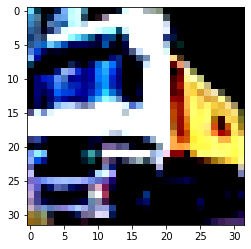

In [ ]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

## 3. Utilizing Pretrained Models (ResNet)

In [ ]:
model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_resnet20", pretrained=True)

Downloading: "https://github.com/chenyaofo/pytorch-cifar-models/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/chenyaofo/pytorch-cifar-models/releases/download/resnet/cifar10_resnet20-4118986f.pt" to /root/.cache/torch/hub/checkpoints/cifar10_resnet20-4118986f.pt


## Q3.1. Get one single CIFAR-10 image from https://github.com/YoongiKim/CIFAR-10-images

In [ ]:
!wget https://github.com/YoongiKim/CIFAR-10-images/blob/master/test/airplane/0001.jpg

## Q3.2. Make it into a tensor (you can utilize the transforms that we previously created)

In [ ]:
from PIL import Image
img = Image.open("./0000.jpg")
img_t = preprocess(img)

# Q3.3. Load a pretrained model from https://github.com/chenyaofo/pytorch-cifar-models

In [ ]:
model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_resnet20", pretrained=True)

# Q3.4. Evaluate the pretrained model

In [ ]:
from torchvision import models
resnet = models.resnet101(pretrained=True)

## Q4. Subclassing `nn.Module` to create Your Own Deep ResNet

## HW: Training Your Own Model